In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("Datasets/all_diseases.csv.gz")

In [3]:
df.head()

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
0,Afghanistan,2020-01-22,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
1,Afghanistan,2020-01-23,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
2,Afghanistan,2020-01-24,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
3,Afghanistan,2020-01-25,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
4,Afghanistan,2020-01-26,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4


In [4]:
x = df[['date', 'no_cases']].set_index('date')
x = x.dropna(how='all')
print(x)

            no_cases
date                
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
...              ...
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0

[161513 rows x 1 columns]


In [5]:
df.country.value_counts()

China                   17766
Canada                   8727
United Kingdom           6264
France                   6264
Australia                4176
                        ...  
Turkmenistan               14
North Korea                11
Congo                      10
Côte d'Ivoire              10
Syrian Arab Republic       10
Name: country, Length: 221, dtype: int64

In [6]:
df[df.country.str.lower().str.contains('america')].country.value_counts()

United States of America    897
Name: country, dtype: int64

In [7]:
us_data = df[df.country.str.lower().str.contains('america')]

In [8]:
us_data.date = pd.to_datetime(us_data.date)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [9]:
us_data.date.dtype

dtype('<M8[ns]')

In [10]:
us_data.date.head()

132588   2020-01-22
132589   2020-01-23
132590   2020-01-24
132591   2020-01-25
132592   2020-01-26
Name: date, dtype: datetime64[ns]

In [11]:
cases_per_date = us_data.groupby(us_data.date.dt.to_period("M"))["no_cases"].sum().to_frame()

In [12]:
cases_per_date.index.to_timestamp()

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [13]:
cases_per_date.index = pd.to_datetime(cases_per_date.index.to_timestamp())

In [14]:
model_fit = ARIMA(cases_per_date, order=(1,1,1))
fit = model_fit.fit()

In [33]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               no_cases   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1126.237
Date:                Sat, 24 Jul 2021   AIC                           2258.474
Time:                        17:08:04   BIC                           2265.505
Sample:                    01-01-2015   HQIC                          2261.286
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0182      0.157     -0.116      0.908      -0.326       0.290
ma.L1          0.5270      0.167      3.162      0.002       0.200       0.854
sigma2      3.251e+11   1.23e-12   2.65e+23      0.000    3.25e+11    3.25e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1584.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):       179525273.68   Skew:                            -2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.16e+38. Standard errors may be unstable.
"""

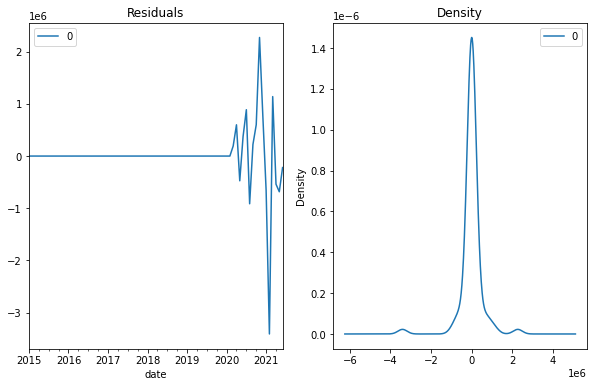

In [36]:
residuals = pd.DataFrame(fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

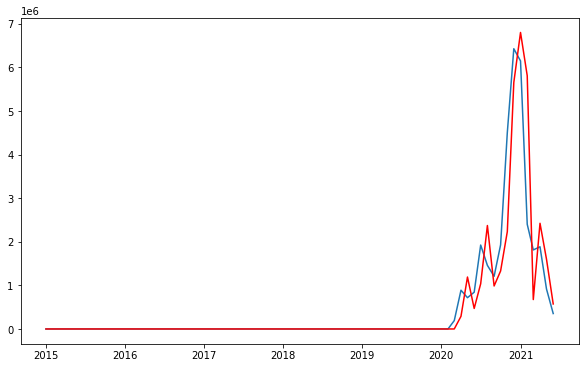

In [15]:
plt.plot(cases_per_date)
plt.plot(fit.fittedvalues, color='red')

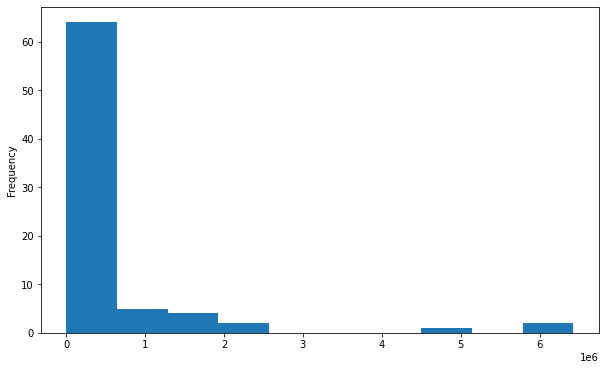

In [16]:
cases_per_date.no_cases.plot(kind="hist")

In [17]:
from math import sqrt

sqrt(mean_squared_error(cases_per_date['no_cases'], fit.fittedvalues))

539420.6200993626

In [21]:
y = cases_per_date.copy()
y['predict'] = fit.fittedvalues
y['abs_percent_error'] = (abs(y.no_cases - y.predict)/y.no_cases) * 100

In [32]:
abs_df  = y[~y.abs_percent_error.isin([np.inf, -np.inf])]
abs_df.abs_percent_error.sum()/y.shape[0]

87.9089256337837

In [46]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#     acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
#             'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [47]:
forecast_accuracy(fit.fittedvalues, cases_per_date.no_cases)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/pyth

{'mape': inf,
 'me': -2138.44962525457,
 'mae': 178886.81844840184,
 'mpe': inf,
 'rmse': 539420.6200993626,
 'corr': 0.904355988438469,
 'minmax': 0.5217775920655796}